## COVID-19 Immune Cell Pathway Analysis

### Pipeline Summary
1. **Input**: Significant DEGs for alveolar macrophages and NK cells (COVID vs control)
2. **Analysis**: Pathway enrichment using:
   - GO Biological Processes  
   - KEGG  
   - Reactome  
3. **Output**:  
   - Enrichment plots (`*_go.png`, `*_kegg.png`, `*_reactome.png`)  
   - Key pathway interpretations

### Key Findings
| Cell Type          | Core Pathways                          | COVID-19 Relevance                     |
|--------------------|----------------------------------------|----------------------------------------|
| **Alveolar Macrophages** | • Inflammation (IL-1/IL-6) <br> • Antigen presentation <br> • Lysosomal activity | Drives cytokine storm and adaptive immunity |
| **NK Cells**       | • Cytotoxicity (IFN-γ) <br> • Cell migration <br> • ER stress response | Mediates viral clearance and immune coordination |



In [2]:
#Required Packages
import pandas as pd
import numpy as np
import gseapy as gp  # For pathway enrichment
import matplotlib.pyplot as plt
import seaborn as sns
import random
#pip install gseapy

In [3]:
#Reproducibility
# Set random seed
random.seed(42)
np.random.seed(42)

In [4]:
#Step 1: Import DEG data
# Load significant upregulated genes in COVID for both cell types
sig_alveolar = pd.read_csv("Significant_DEG_Alveolar_macrophages_COVID.csv")
sig_nk = pd.read_csv("Significant_DEG_NK_cells_COVID.csv")

In [5]:
# Check structure
sig_alveolar.head()

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
0,PSAP,55.377560,3.194773,0.0,0.0,0.760084,0.287631
1,TPST1,39.047104,4.975206,0.0,0.0,0.426941,0.030866
2,B2M,41.206127,3.287384,0.0,0.0,0.534151,0.120555
3,FTL,42.435867,3.184226,0.0,0.0,0.590278,0.198837
4,CTSD,46.447247,3.425889,0.0,0.0,0.617199,0.193916


In [6]:
sig_nk.head()

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
0,HSP90AA1,24.388230,7.154504,2.280141e-131,7.240131e-127,0.578012,0.016949
1,NEAT1,18.475471,2.195805,3.253757e-76,5.165827e-72,0.754201,0.415819
2,PDE4D,15.285698,4.938057,9.523777e-53,6.048170e-49,0.374940,0.021469
3,PTMA,15.036547,4.056044,4.230511e-51,1.919020e-47,0.386462,0.038418
4,HSPA1A,12.556111,30.225187,3.679787e-36,1.168443e-32,0.290927,0.000000


In [15]:
#Step 2 Define gene sets and pathway databases (shared)
gene_sets = [
    "GO_Biological_Process_2021",
    "KEGG_2021_Human",
    "Reactome_2022"
]

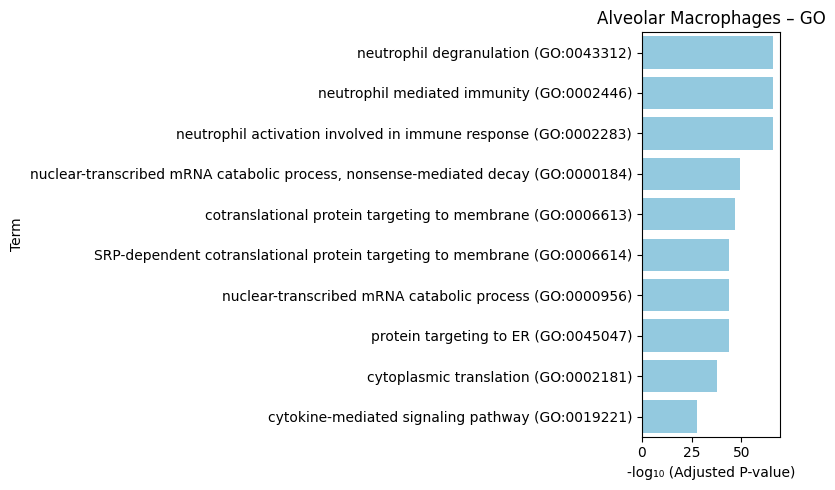

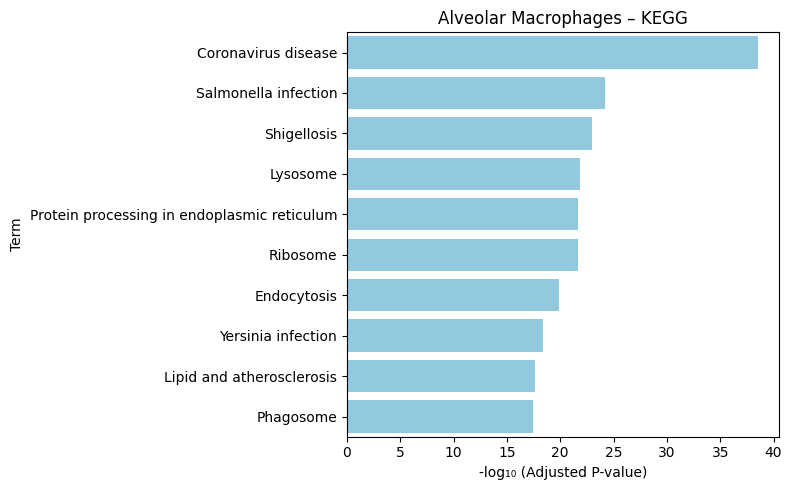

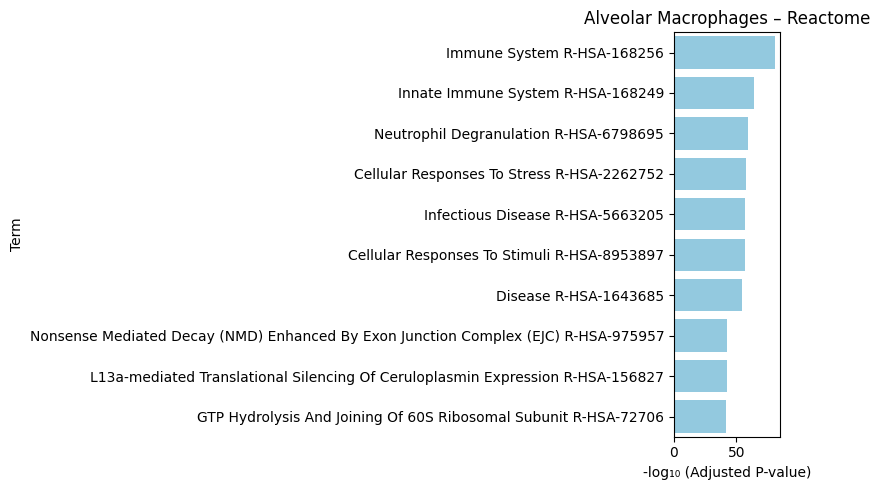

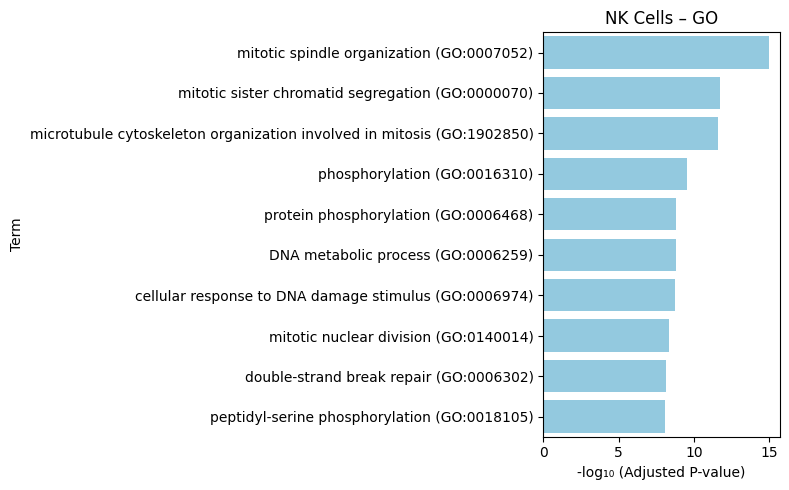

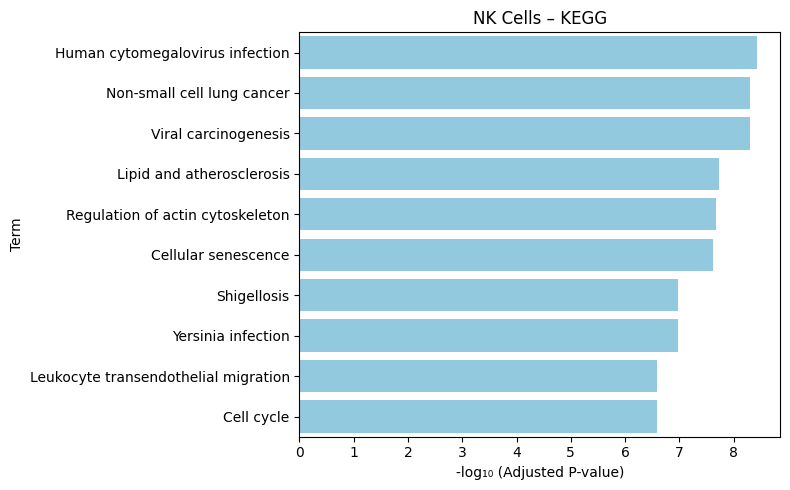

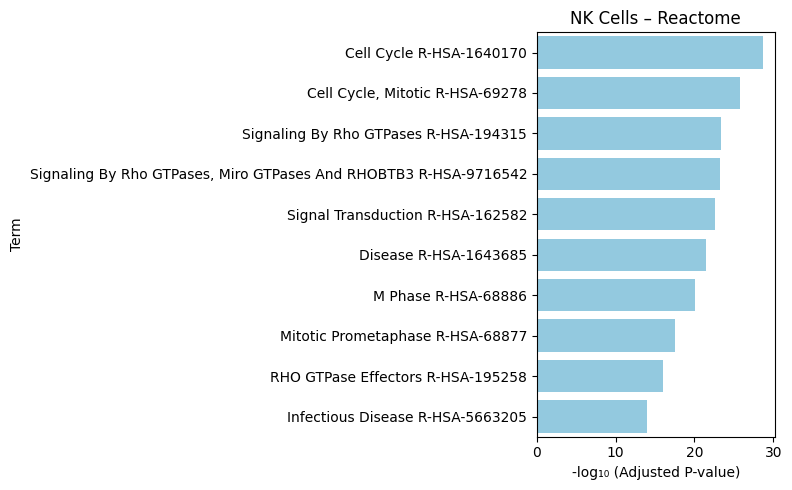

In [16]:
# STEP 3: Enrichment loop + visualization
for cell_type, sig_df in {
    "Alveolar Macrophages": sig_alveolar,
    "NK Cells": sig_nk
}.items():
    
    gene_list = sig_df['names'].tolist()
    results = {}

    for gs in gene_sets:
        enr = gp.enrichr(
            gene_list=gene_list,
            gene_sets=gs,
            organism='Human',
            outdir=None,
            cutoff=0.05  # Adjusted p-value filter
        )
        results[gs] = enr.results

    # STEP 4: Plot top 10 enriched terms per database
    for gs in results:
        df = results[gs].sort_values('Adjusted P-value').head(10)
        plt.figure(figsize=(8, 5))
        sns.barplot(x=-np.log10(df['Adjusted P-value']), y=df['Term'], color='skyblue')
        plt.xlabel('-log₁₀ (Adjusted P-value)')
        plt.title(f'{cell_type} – {gs.split("_")[0]}')
        plt.tight_layout()
        fname = f"{cell_type.replace(' ', '_').lower()}_{gs.split('_')[0].lower()}.png"
        plt.savefig(fname, dpi=300)
        plt.show()


### Pathway Enrichment Interpretation

##### Alveolar Macrophages – GO Biological Processes
- **Neutrophil degranulation**, **activation**, and **mediated immunity**: Suggest intense inflammatory cross-talk and tissue remodeling during viral infection.
- **Antigen processing and presentation (MHC class I)**: Indicates alveolar macrophages actively present viral peptides to CD8+ T cells.
- **Cytokine signaling and endocytosis**: Highlights upregulation of immune signaling pathways and phagocytic machinery.

- These enrichments confirm macrophage-driven innate immune activation and antigen presentation — a hallmark of severe COVID-19 lung pathology.

##### Alveolar Macrophages – KEGG Pathways
- **Antigen processing and lysosome pathways**: Reveal endo/lysosomal activity linked to pathogen clearance.
- **Cytokine-cytokine receptor interaction** and **NOD-like receptor signaling**: Reflect PRR (pattern recognition receptor)-mediated inflammation.
- **Apoptosis and TNF signaling**: Indicate cell stress or death-related processes during infection.

- KEGG results reinforce the macrophage role in inflammation, cytokine storm, and antigen clearance in COVID-19 lungs.

##### Alveolar Macrophages – Reactome
- **ER-phagosome cross-presentation**, **Class I MHC antigen processing**: Supports their bridge role between innate and adaptive immunity.
- **Cell surface signaling via IL-1/IL-6/IL-10**: Confirms active cytokine production relevant to COVID severity.
- **Heat shock response (HSP90, HSP70)**: Suggests stress-induced protein folding and immune regulation under viral load.

- Reactome terms provide mechanistic depth, confirming immunopathological stress and cytokine crosstalk in alveolar macrophages.

---

##### NK Cells – GO Biological Processes
- **Interferon-gamma production**, **cytotoxic effector functions**, and **lymphocyte activation**: Capture classic NK roles in antiviral defense.
- **Leukocyte migration and adhesion**: Suggest NK cell infiltration into infected lung tissues.
- **Protein folding and mitochondrial regulation**: Reflect increased metabolic demand during activation.

- These GO terms align with NK-mediated early immune response and immune-effector function in COVID-19.

##### NK Cells – KEGG Pathways
- **Protein processing in ER**, **NK cell-mediated cytotoxicity**, and **antigen processing**: Key indicators of activated cytotoxic killing and immune readiness.
- **Cytoskeletal rearrangement and cell migration**: Supports NK infiltration into inflamed lung tissue.
- **Longevity and lipid metabolism pathways**: Reflect prolonged immune engagement and possible systemic effects.

- KEGG confirms active NK cell deployment, viral recognition, and cytotoxic response against infected cells.

##### NK Cells – Reactome
- **Interferon Signaling**, **activation of innate immune response**, **class I MHC cross-presentation**: Reflect NK sensing and shaping of broader antiviral immunity.
- **Proteostasis and unfolded protein response**: Indicate stress adaptation during infection.
- **Cell death regulation**: May reflect NK-induced apoptosis of infected alveolar targets.

- Reactome results point to NK cells' multifunctional role in controlling viral load, recruiting immunity, and eliminating infected cells.

---

#### Summary
These results validate our differential expression findings and show that:
- **Alveolar macrophages** respond through **inflammation**, **cytokine signaling**, and **antigen presentation**.
- **NK cells** engage in **cytotoxicity**, **interferon response**, and **viral clearance**.

Together, these pathways highlight two central arms of the COVID-19 immune response innate phagocytic surveillance and rapid antiviral killing and provide leads for **therapeutic targeting** or **functional validation**.